a) grafica de cantidad vendida por producto

##PRODUCTOS.csv:
 de esta tabla necesitamos el nombre del producto, en total son 27 y no estan repetidos, por lo cual son datos en el eje "x" de la grafica para luego ubicar su frecuencia que en este caso es la cantidad vendida por el nombre de cada producto distinto.

In [24]:
import pandas as pd
pd.read_csv("PRODUCTOS.csv", sep=";")

,nombre,nombre_gen,tipo,precio,valoracion,garantia,Vida_util_mes
0,miniglide,Mouse,Periferico,$20,3.0,0,5
1,TechRodent,Mouse,Periferico,$32,2.5,0,7
2,Masterswipe,Mouse,Periferico,$58,4.0,0,10
3,Mightyscroller,Mouse,Periferico,$80,4.6,0,15
4,gizmoclick,Mouse,Periferico,$70,4.8,0,20
5,typomaster,Teclado,Periferico,$30,2.3,0,10
6,qwertyguardian,Teclado,Periferico,$40,2.4,0,15
7,enterwizard,Teclado,Periferico,$46,4.6,0,17
8,shiftmate,Teclado,Periferico,$71,4.7,0,20
9,escaper,Teclado,Periferico,$80,4.5,0,26


##FACTURA.csv:
de esta tabla necesitamos primero la columna Producto en la cual obtenemos los nombres que coincidan y asi asociarlos con su respectiva cantidad en la columna Cantidad que se ubicaria en el eje "y" del grafico como una sumatoria de cantidades de un mismo nombre de producto.

In [6]:
pd.read_csv("FACTURA.csv")

,ID_Factura,Producto,Cantidad
0,10440,escaper,125
1,10440,lamina plastica,65
2,10440,escaper,145
3,10440,miniglide,142
4,10440,LCD 30hz pb23,56
...,...,...,...
131377,22157,earecho,42
131378,22157,LCD 60hz pldas,89
131379,22157,miniglide,107
131380,22157,Vidrio templado,82


##GRAFICA:

para la grafica primero se cargaron ambos csv, en el de "PRODUCTOS.csv" habia que delimitar el ";" de los titulos de las columnas para que no surgieran problemas para reconocer las columnas, el codigo usa pandas para cargar los datos, combinar las columnas y calcular la cantidad total de cada producto, luego usa matplotlib para crear un grafico de barras que muestra la cantidad total de cada producto en el eje "y" con el nombre del producto en el eje "x" con un grafico de lineas para mejorar el orden visual.

Producto con la menor cantidad vendida: Vidrio templado
Cantidad vendida: 227102

Producto con la mayor cantidad vendida: escaper
Cantidad vendida: 560877


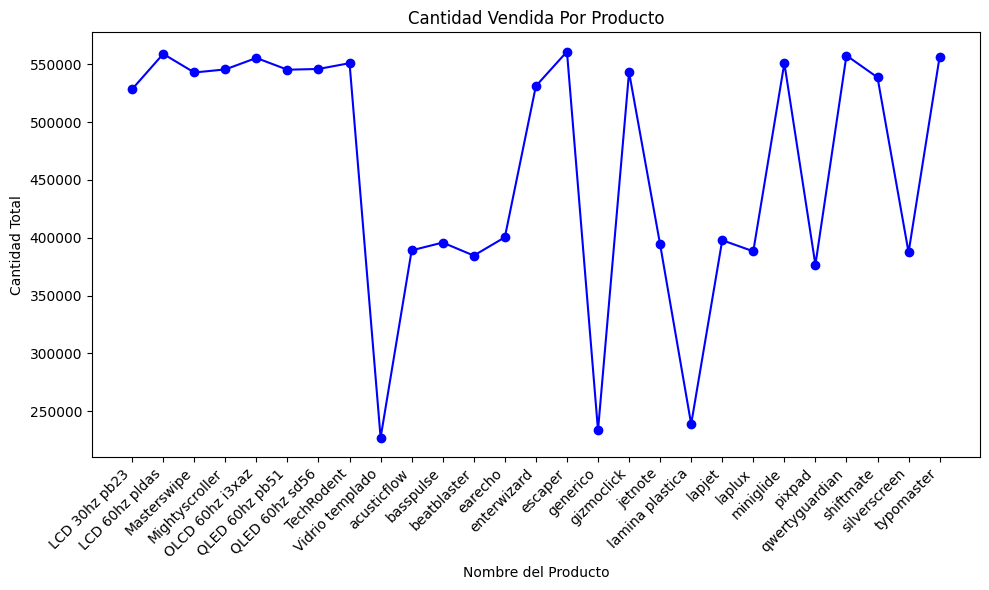

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar los datos de los archivos CSV
productos_df = pd.read_csv('PRODUCTOS.csv', delimiter=';')
factura_df = pd.read_csv('FACTURA.csv')

#Combinar las columnas en base al nombre del producto
merged_df = pd.merge(factura_df, productos_df, left_on='Producto', right_on='nombre', how='left')

#cantidad total por producto
cantidad_total_por_producto = merged_df.groupby('nombre')['Cantidad'].sum().reset_index()

#gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cantidad_total_por_producto['nombre'], cantidad_total_por_producto['Cantidad'], marker='o', linestyle='-', color='b')
plt.xlabel('Nombre del Producto')
plt.ylabel('Cantidad Total')
plt.title('Cantidad Vendida Por Producto')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

# producto con la menor cantidad vendida
producto_menor_cantidad = cantidad_total_por_producto.loc[cantidad_total_por_producto['Cantidad'].idxmin()]
print(f"Producto con la menor cantidad vendida: {producto_menor_cantidad['nombre']}")
print(f"Cantidad vendida: {producto_menor_cantidad['Cantidad']}")

# producto con la mayor cantidad vendida
producto_mayor_cantidad = cantidad_total_por_producto.loc[cantidad_total_por_producto['Cantidad'].idxmax()]
print(f"\nProducto con la mayor cantidad vendida: {producto_mayor_cantidad['nombre']}")
print(f"Cantidad vendida: {producto_mayor_cantidad['Cantidad']}")
plt.show()

##OBSERVACIONES:

el producto con la menor cantidad vendida fue el Vidrio templado con una cantidad vendida de 227102 unidades, mientras el producto con la mayor cantidad vendida fue el escaper con una cantidad vendida de 560877 unidades, los productos de tipo monitor como LCD 30hz, QLED y masterswipe tienen una cantidad de ventas muy alta y a la vez muy similar.